## Airplane  Risk Analysis for Business Expansion



## Project Overview
Our company is interested in purchasing and operating airplanes for commercial and private enterprises. This analysis evaluates aviation accident data to identify low-risk aircraft manufacturers for the expansion into commercial and private aviation. This project examines factors like accident severity, aircraft damage, and manufacturer trends, to provide data-driven recommendations that minimize operational risks and support safe business growth.

## Data Source
The dataset from the National Transportation Safety Board (NTSB), has aviation accidents and incidents records from 1948 to 2023. It includes detailed records on event dates, injuries, aircraft types and more. The data can be accessed [here](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3/tree/master/data)

## Importing Libraries
We begin by importing important Python libraries to be used for this analysis

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Loading Data
we load the dataset into a Pandas DataFrame and preview the first few rows to understand its structure.

In [2]:
#Loading the dataset into pandas dataframe
df = pd.read_csv('data/Aviation_Data.csv')
#Display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Inspection



In [3]:
df.shape

(90348, 31)

In [4]:
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [5]:
#Display basic information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [7]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### Insights from Inspection

The dataset contains 90,348 rows and 31 columns, covering a wide range of accident details. Significant missing values appear in columns like Latitude and Longitude. Columns include event details, aircraft specs, injuries and weather conditions, but not all are relevant for our risk analysis.

## Selecting Relevant columns
Given our focus on low-risk airplanes for commercial/private use, we prioritize columns related to accident timing, severity, aircraft properties, purpose of flight and injury outcomes. Irrelevant columns like airport codes are  dropped to keep the analysis focused.


In [8]:
relevant_df = df[["Event.Date","Injury.Severity","Aircraft.damage","Aircraft.Category","Make","Model","Number.of.Engines","Engine.Type","Purpose.of.flight","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]]
relevant_df

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0
90344,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0
90345,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0
90346,2022-12-26,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0


In [9]:
relevant_df.shape

(90348, 13)

In [10]:
relevant_df.isna().sum()


Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
dtype: int64

## Data Cleaning

We handle missing values and convert 'Event.Date' to datetime for trend analysis. Injury columns are filled with 0 where missing, assuming no reported injuries. We exclude rows with missing information on key aircraft properties like make and model.
Our analysis will streamline to airplane aircraft analysis since our company is planning on purchasing airplanes.

In [11]:
# Filter rows where Aircraft.category is 'Airplane'
airplanes_df = relevant_df[relevant_df['Aircraft.Category'] == 'Airplane']
airplanes_df




,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0
7,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0
12,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0
13,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90332,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,NaN,Personal,0.0,0.0,0.0,1.0
90335,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90336,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,1.0,NaN,Personal,0.0,1.0,0.0,0.0


In [12]:
airplanes_df.isna().sum()

Event.Date                   0
Injury.Severity            814
Aircraft.damage           1282
Aircraft.Category            0
Make                         9
Model                       31
Number.of.Engines         2754
Engine.Type               4226
Purpose.of.flight         3739
Total.Fatal.Injuries      3165
Total.Serious.Injuries    3224
Total.Minor.Injuries      2878
Total.Uninjured            900
dtype: int64

In [13]:
airplanes_df['Model'].unique()

array(['DC9', '140', '401B', ..., 'PHANTOM', 'KITFOX S5', 'M-8 EAGLE'],
      dtype=object)

In [14]:
airplanes_df['Make'].unique()

array(['Mcdonnell Douglas', 'Cessna', 'Bellanca', ..., 'GREG HOBBS',
       'JAMES R DERNOVSEK', 'ORLICAN S R O'], dtype=object)

In [15]:
#Drop rows with missing values for make and model
airplanes_df1 = airplanes_df.dropna(subset=['Make','Model'])
airplanes_df1

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0
7,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0
12,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0
13,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90332,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,NaN,Personal,0.0,0.0,0.0,1.0
90335,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90336,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,1.0,NaN,Personal,0.0,1.0,0.0,0.0


In [16]:
airplanes_df1.isna().sum()

Event.Date                   0
Injury.Severity            812
Aircraft.damage           1279
Aircraft.Category            0
Make                         0
Model                        0
Number.of.Engines         2749
Engine.Type               4213
Purpose.of.flight         3730
Total.Fatal.Injuries      3159
Total.Serious.Injuries    3216
Total.Minor.Injuries      2871
Total.Uninjured            894
dtype: int64

In [17]:
airplanes_df1['Purpose.of.flight'].unique()

array([nan, 'Personal', 'Business', 'Instructional', 'Ferry', 'Unknown',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Positioning', 'Other Work Use',
       'Public Aircraft - Federal', 'Air Race/show', 'Flight Test',
       'Public Aircraft - State', 'Glider Tow', 'Banner Tow',
       'Firefighting', 'External Load', 'Air Race show',
       'Public Aircraft - Local', 'Air Drop', 'PUBS', 'ASHO'],
      dtype=object)

In [18]:
#keep rows with valid engine count
airplanes_df2 = airplanes_df1[airplanes_df1['Number.of.Engines'] > 0]
airplanes_df2



,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0
7,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0
12,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0
13,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Non-Fatal,Substantial,Airplane,PIPER,PA42,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90332,2022-12-14,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,1.0,NaN,Personal,0.0,0.0,0.0,1.0
90335,2022-12-15,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,2.0,NaN,NaN,0.0,0.0,0.0,1.0
90336,2022-12-16,Minor,Substantial,Airplane,CESSNA,R172K,1.0,NaN,Personal,0.0,1.0,0.0,0.0


In [19]:
airplanes_df2['Engine.Type'].unique()

array(['Turbo Fan', 'Reciprocating', 'Turbo Prop', 'Turbo Jet', 'Unknown',
       nan, 'Turbo Shaft', 'Electric', 'Geared Turbofan', 'UNK'],
      dtype=object)

In [20]:
# Replace 'UNK' with 'Unknown' in Engine.Type
airplanes_df2['Engine.Type'] = airplanes_df2['Engine.Type'].replace({'UNK': 'Unknown'})


In [21]:
airplanes_df2['Engine.Type'].unique()

array(['Turbo Fan', 'Reciprocating', 'Turbo Prop', 'Turbo Jet', 'Unknown',
       nan, 'Turbo Shaft', 'Electric', 'Geared Turbofan'], dtype=object)

In [22]:
#Drop rows with missing data in categorical data
airplanes_df3 = airplanes_df2.dropna(subset=['Engine.Type','Injury.Severity','Aircraft.damage','Purpose.of.flight'])
airplanes_df3

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
7,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0
12,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0
13,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0
14,1982-01-02,Fatal(1),Destroyed,Airplane,Navion,A,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,150,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90106,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,177RG,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
90120,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,B-60,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90194,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,MS-500,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0


In [23]:
airplanes_df3['Purpose.of.flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Ferry', 'Unknown',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Positioning', 'Other Work Use',
       'Public Aircraft - Federal', 'Air Race/show', 'Flight Test',
       'Public Aircraft - State', 'Glider Tow', 'Banner Tow',
       'Firefighting', 'Air Race show', 'Public Aircraft - Local',
       'Air Drop', 'PUBS', 'ASHO'], dtype=object)

In [24]:
#replace missing numerical data with zero values

numerical_columns = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
airplanes_df3[numerical_columns] = airplanes_df3[numerical_columns].fillna(0)


In [25]:
airplanes_df3.isna().sum()

Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

In [26]:
airplanes_df3.dtypes


Event.Date                 object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
dtype: object

In [27]:
#convert Event.Date to datetime for analysis
airplanes_df3['Event.Date'] = pd.to_datetime(airplanes_df3['Event.Date'], errors='coerce')



In [28]:
# Keep only rows where Event.Date is after 31 Dec 2000
airplanes_df4 = airplanes_df3[airplanes_df3['Event.Date'] > '2000-12-31']
print(airplanes_df4['Event.Date'].min())


2001-01-07 00:00:00


In [29]:
airplanes_df4

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
49916,2001-01-07,Non-Fatal,Substantial,Airplane,Cessna,182A,1.0,Reciprocating,Skydiving,0.0,0.0,0.0,1.0
49949,2001-01-14,Non-Fatal,Destroyed,Airplane,Learjet,LJ-60,2.0,Turbo Jet,Executive/corporate,0.0,2.0,0.0,0.0
49991,2001-01-24,Fatal(4),Destroyed,Airplane,Beech,F90-42,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0
50058,2001-02-06,Non-Fatal,Substantial,Airplane,Dassault-breguet,MYSTERE FALCON 900,2.0,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0
50155,2001-03-01,Non-Fatal,Substantial,Airplane,Meshko Zenair,CH-701,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,150,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90106,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,177RG,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
90120,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,B-60,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90194,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,MS-500,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0


In [30]:
airplanes_df4['Make'] = airplanes_df4['Make'].replace({'CESSNA': 'Cessna', 'MOONEY': 'Mooney','BEECH':'Beech','Beechcraft':'Beech','PIPER':'Piper'})


In [31]:
airplanes_df4['Make'] = airplanes_df4['Make'].replace({'CESSNA AIRCRAFT':'Cessna','BELLANCA':'Bellanca','CIRRUS DESIGN CORP':'CIRRUS'})


In [32]:
airplanes_df4['Make'] = airplanes_df4['Make'].replace({'CIRRUS': 'Cirrus','Hawker Beechcraft':'Beech','Cirrus Design Corp.':'Cirrus'})


In [33]:
airplanes_df4

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
49916,2001-01-07,Non-Fatal,Substantial,Airplane,Cessna,182A,1.0,Reciprocating,Skydiving,0.0,0.0,0.0,1.0
49949,2001-01-14,Non-Fatal,Destroyed,Airplane,Learjet,LJ-60,2.0,Turbo Jet,Executive/corporate,0.0,2.0,0.0,0.0
49991,2001-01-24,Fatal(4),Destroyed,Airplane,Beech,F90-42,2.0,Turbo Prop,Business,4.0,0.0,0.0,0.0
50058,2001-02-06,Non-Fatal,Substantial,Airplane,Dassault-breguet,MYSTERE FALCON 900,2.0,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0
50155,2001-03-01,Non-Fatal,Substantial,Airplane,Meshko Zenair,CH-701,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,2022-10-06,Non-Fatal,Substantial,Airplane,Cessna,150,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90106,2022-10-08,Non-Fatal,Substantial,Airplane,Cessna,177RG,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0
90120,2022-10-13,Non-Fatal,Substantial,Airplane,Beech,B-60,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0
90194,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,MS-500,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0


## Data Analysis


In [34]:
#top airplanes manufactures
top_manufacturers = airplanes_df4['Make'].value_counts().head(10)
top_manufacturers

Cessna             5678
Piper              3239
Beech              1047
Mooney              305
Cirrus              271
Bellanca            199
AIR TRACTOR INC     175
AERONCA             124
MAULE               122
Air Tractor         107
Name: Make, dtype: int64

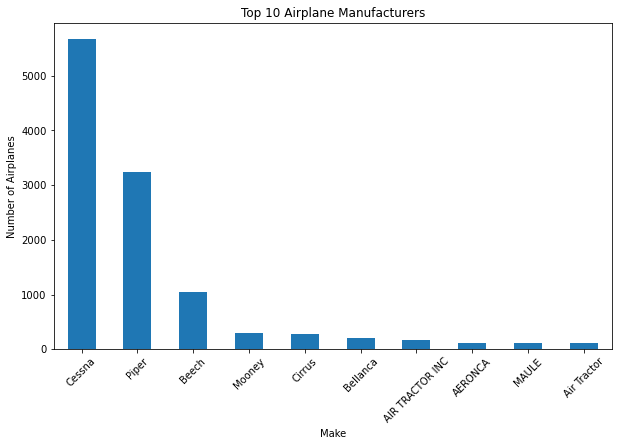

In [35]:
import matplotlib.pyplot as plt

top_manufacturers.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Airplane Manufacturers')
plt.xlabel('Make')
plt.ylabel('Number of Airplanes')
plt.xticks(rotation=45)
plt.show()


The top 10 airplane manufacturers shows which planes are most commonly used. Zero incidents reported does not directly relate to the safest airplane. Since our company is new in the airplane business, focusing on popular manufactures will help identify low risk airplanes since it has high number of records for this analysis. Cessna and Piper dominate incidents, likely due to their popularity in general aviation

In [36]:
#top manufacturer name
top_manufacturer_name = top_manufacturers.idxmax()
top_manufacturer_name

'Cessna'

In [37]:
airplanes_df4['Event.Date'] = pd.to_datetime(airplanes_df4['Event.Date'], errors='coerce')
airplanes_df4['Year'] = airplanes_df4['Event.Date'].dt.year
top_manufacturer_df = airplanes_df4[airplanes_df4['Make'] == top_manufacturer_name]

#Aggregate injuries by year
Injuries_by_year = top_manufacturer_df.groupby('Year')[[
    'Total.Fatal.Injuries', 
    'Total.Serious.Injuries',
    'Total.Minor.Injuries'
]].sum()
Injuries_by_year



,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Year,,,
2001,5.0,0.0,2.0
2002,2.0,2.0,2.0
2003,13.0,9.0,16.0
2004,2.0,9.0,49.0
2005,0.0,7.0,56.0
2006,18.0,10.0,40.0
2007,54.0,14.0,93.0
2008,120.0,95.0,62.0
2009,86.0,98.0,35.0


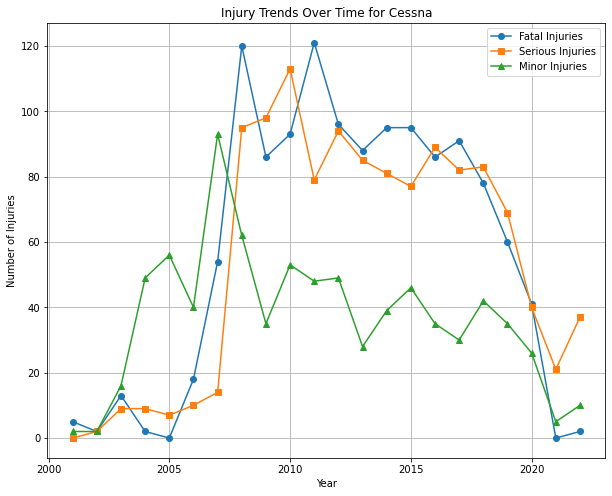

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
# Plot each column as a separate line
plt.plot(Injuries_by_year.index, Injuries_by_year['Total.Fatal.Injuries'], marker='o', label='Fatal Injuries')
plt.plot(Injuries_by_year.index, Injuries_by_year['Total.Serious.Injuries'], marker='s', label='Serious Injuries')
plt.plot(Injuries_by_year.index, Injuries_by_year['Total.Minor.Injuries'], marker='^', label='Minor Injuries')

plt.title(f'Injury Trends Over Time for {top_manufacturer_name}')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend()
plt.grid(True)
plt.show()



The chart demonstrate a downward trend with time. This means that the number of injuries reported for cessna airplanes is decreasing hence its safety is improving over time. This will be suitable for commercial purposes since safety of passengers is key.

In [39]:
#Damage severity for the top manufacturer
top_manufacturer_df = airplanes_df4[airplanes_df4['Make'] == top_manufacturer_name]
damage_counts = top_manufacturer_df['Aircraft.damage'].value_counts()
damage_counts


Substantial    5281
Destroyed       350
Minor            45
Unknown           2
Name: Aircraft.damage, dtype: int64

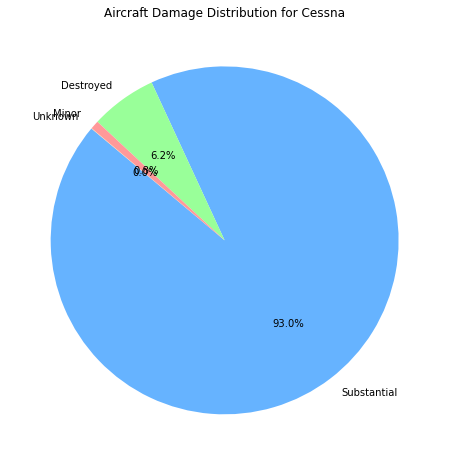

In [40]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'])
plt.title(f'Aircraft Damage Distribution for {top_manufacturer_name}')
plt.show()


From the chart above, substantial damage accounts for 93% of the reported cases for the top manufacturer. This indicates serious structural damage that usually requires major repairs. This will require high repair cost for the company. When considering costs risk, the company should incorporate other airplanes from the top 10 manufacturers.


In [41]:
#top manufacturers with least fatalities
top_manufacturers = airplanes_df4['Make'].value_counts().head(5).index.tolist()
top_manufacturers_df = airplanes_df4[airplanes_df4['Make'].isin(top_manufacturers)]

# Aggregate total fatalities by manufacturer
fatalities_by_make = (
    top_manufacturers_df
    .groupby('Make')['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)

# Sort to find manufacturers with least fatalities
lowest_fatal_manufacturers = fatalities_by_make.sort_values('Total.Fatal.Injuries')
lowest_fatal_manufacturers = lowest_fatal_manufacturers.reset_index(drop=True)
lowest_fatal_manufacturers








,Make,Total.Fatal.Injuries
0,Mooney,131.0
1,Cirrus,141.0
2,Beech,547.0
3,Piper,927.0
4,Cessna,1246.0


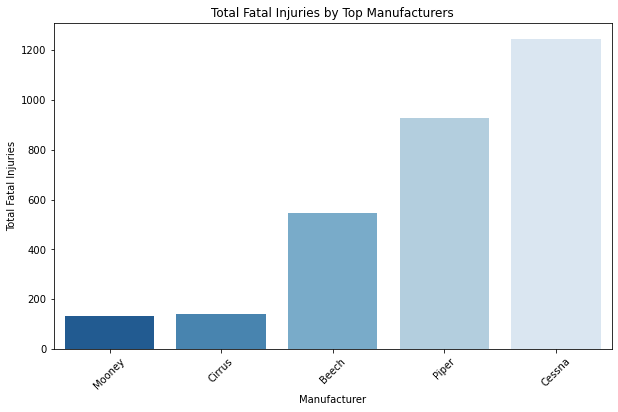

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.barplot(
    x='Make', 
    y='Total.Fatal.Injuries', 
    data=lowest_fatal_manufacturers, 
    palette='Blues_r'
)
plt.title('Total Fatal Injuries by Top Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()



From the bar chart, Mooney has the least fatalities. This would indicate improved safety measures by the manufacturer. Again cessna and piper highest number of fatalities and maybe due to its wide exposure.

In [43]:
airplanes_df4.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17822 entries, 49916 to 90226
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              17822 non-null  datetime64[ns]
 1   Injury.Severity         17822 non-null  object        
 2   Aircraft.damage         17822 non-null  object        
 3   Aircraft.Category       17822 non-null  object        
 4   Make                    17822 non-null  object        
 5   Model                   17822 non-null  object        
 6   Number.of.Engines       17822 non-null  float64       
 7   Engine.Type             17822 non-null  object        
 8   Purpose.of.flight       17822 non-null  object        
 9   Total.Fatal.Injuries    17822 non-null  float64       
 10  Total.Serious.Injuries  17822 non-null  float64       
 11  Total.Minor.Injuries    17822 non-null  float64       
 12  Total.Uninjured         17822 non-null  fl

In [44]:
# Filter for top manufacturers
top_manufacturers_df = airplanes_df4[airplanes_df4['Make'].isin(top_manufacturers)]
# Create a pivot table: counts of each damage type per manufacturer
damage_counts = top_manufacturers_df.pivot_table(
    index='Make',
    columns='Aircraft.damage',
    aggfunc='size',
    fill_value=0
)

damage_counts


Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Make,,,,
Beech,139,11,897,0
Cessna,350,45,5281,2
Cirrus,43,10,218,0
Mooney,31,3,271,0
Piper,267,23,2948,1


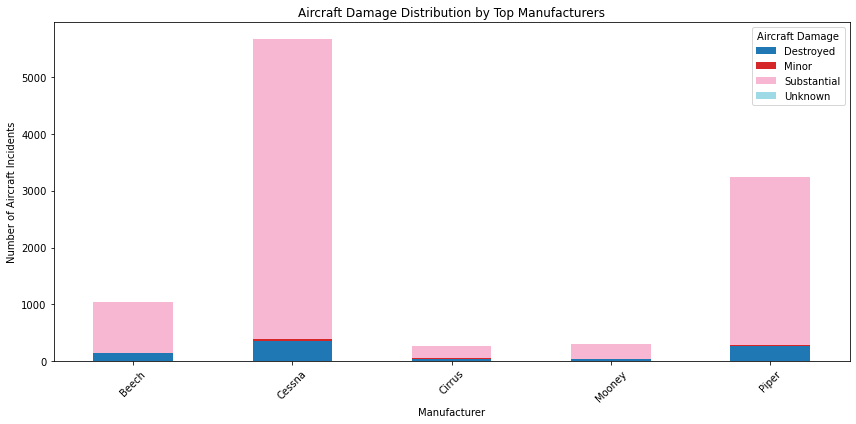

In [45]:
import matplotlib.pyplot as plt

# Plot
damage_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

plt.title('Aircraft Damage Distribution by Top Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Aircraft Incidents')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()


From the stacked bar chart, Cirrus make reports the least destroyed and substancial damage.